In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

In [21]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()



In [22]:
#luego realizamos una transformacion de datos para entrenar nuestro modelo de deep learning
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))
##realizamos un escalado de datos en un rango de [0,1]
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
#ahora transformamos los datos de los labels de salida



In [23]:
from tensorflow.keras.utils import to_categorical
y_test=to_categorical(y_test,num_classes=10)
y_train=to_categorical(y_train,num_classes=10)

In [12]:
#ahora creamos el modelo(configuracion del modelo)
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))


In [13]:
#configuracion de compilacion
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
#configuracion de entrenamiento
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2584 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0364 - accuracy: 0.9892


In [28]:
train_loss,train_acc=model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0223 - accuracy: 0.9939


In [29]:
train_acc

0.9938666820526123

In [30]:
#ahora si hacemos la evaluacion en los datos nunca vistos
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9806


In [31]:
test_acc

0.9805999994277954

In [32]:
##ahora haremos pruebas sobre la seccion de tensores
(x_train,y_train),(x_test,y_test)=mnist.load_data()

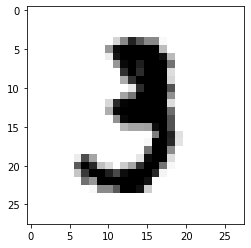

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

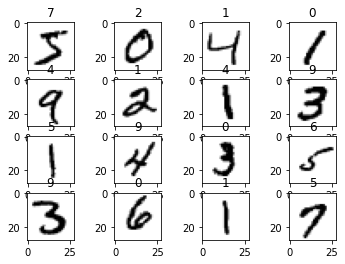

In [46]:
%matplotlib inline
#podemos graficar de forma paralela mas digitos
import numpy as np 
fig,axes=plt.subplots(4,4)
for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i],cmap=plt.cm.binary)
    ax.set_title(y_test[i])
plt.show()